**Multi-layer Perceptron**

Multi-layer perception is also known as MLP. It is fully connected dense layers, which transform any input dimension to the desired dimension. A multi-layer perception is a neural network that has multiple layers. To create a neural network we combine neurons together so that the outputs of some neurons are inputs of other neurons.

A gentle introduction to neural networks and TensorFlow can be found here:

Neural Networks


Introduction to TensorFlow

A multi-layer perceptron has one input layer and for each input, there is one neuron(or node), it has one output layer with a single node for each output and it can have any number of hidden layers and each hidden layer can have any number of nodes. A schematic diagram of a Multi-Layer Perceptron (MLP) is depicted below.

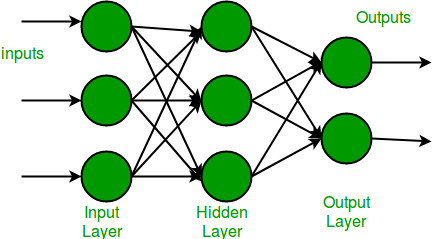

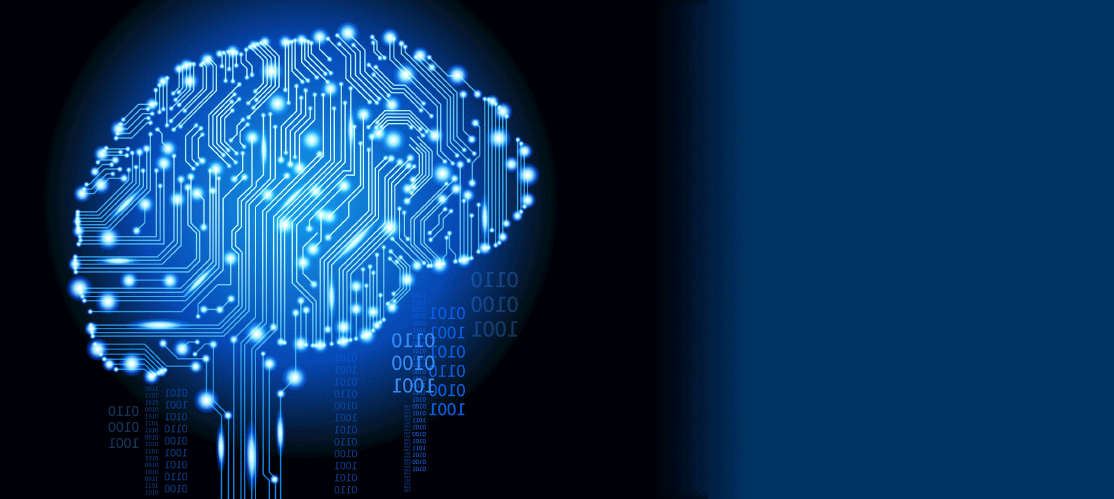

In the multi-layer perceptron diagram above, we can see that there are three inputs and thus three input nodes and the hidden layer has three nodes. The output layer gives two outputs, therefore there are two output nodes. The nodes in the input layer take input and forward it for further process, in the diagram above the nodes in the input layer forwards their output to each of the three nodes in the hidden layer, and in the same way, the hidden layer processes the information and passes it to the output layer.

Every node in the multi-layer perception uses a sigmoid activation function. The sigmoid activation function takes real values as input and converts them to numbers between 0 and 1 using the sigmoid formula.

image.png

Now that we are done with the theory part of multi-layer perception, let’s go ahead and implement some code in python using the TensorFlow library.

**Stepwise Implementation**

**Step 1**: Import the necessary libraries.

In [1]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt


**Step 2**: Download the dataset.



TensorFlow allows us to read the MNIST dataset and we can load it directly in the program as a train and test dataset.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train

**Step 3:** Now we will convert the pixels into floating-point values.

In [4]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize image pixel values by dividing
# by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

We are converting the pixel values into floating-point values to make the predictions. Changing the numbers into grayscale values will be beneficial as the values become small and the computation becomes easier and faster. As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1

**Step 4:** Understand the structure of the dataset

In [5]:
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


Thus we get that we have 60,000 records in the training dataset and 10,000 records in the test dataset and Every image in the dataset is of the size 28×28.

**Step 5:** Visualize the data.

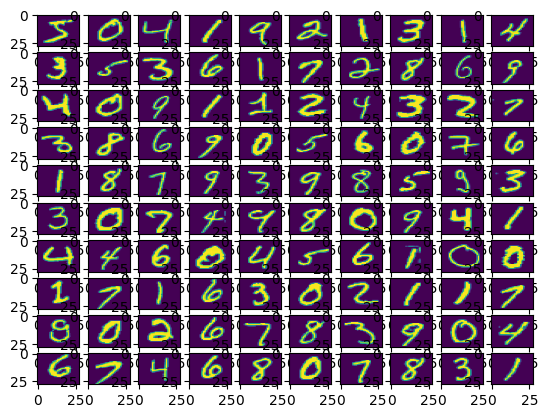

In [6]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
	for j in range(10):
		ax[i][j].imshow(x_train[k].reshape(28, 28),
						aspect='auto')
		k += 1
plt.show()

**Step 6:** Form the Input, hidden, and output layers.

In [ ]:
help(Dense)

In [7]:
model = Sequential([

	# reshape 28 row * 28 column data to 28*28 rows
	Flatten(input_shape=(28, 28)),

	# dense layer 1
	Dense(256, activation='sigmoid'),

	# dense layer 2
	Dense(128, activation='sigmoid'),

	# output layer
	Dense(10, activation='sigmoid'),
])


**Some important points to note:**



The Sequential model allows us to create models layer-by-layer as we need in a multi-layer perceptron and is limited to single-input, single-output stacks of layers.


Flatten flattens the input provided without affecting the batch size. For example, If inputs are shaped (batch_size,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch_size, 1).



Activation is for using the sigmoid activation function.

The first two Dense layers are used to make a fully connected model and are the hidden layers.


The last Dense layer is the output layer which contains 10 neurons that decide which category the image belongs to.


**Step 7:** Compile the model.

In [8]:
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


Compile function is used here that involves the use of loss, optimizers, and metrics. Here loss function used is sparse_categorical_crossentropy, optimizer used is adam

**Step 8:** Fit the model.

In [9]:
model.fit(x_train, y_train, epochs=10,
		batch_size=2000,
		validation_split=0.2)


Epoch 1/10
24/24 [==============================] - 2s 57ms/step - loss: 2.1024 - accuracy: 0.3914 - val_loss: 1.7618 - val_accuracy: 0.6641
Epoch 2/10
24/24 [==============================] - 1s 52ms/step - loss: 1.4355 - accuracy: 0.7024 - val_loss: 1.0965 - val_accuracy: 0.7847
Epoch 3/10
24/24 [==============================] - 1s 54ms/step - loss: 0.9220 - accuracy: 0.8002 - val_loss: 0.7244 - val_accuracy: 0.8527
Epoch 4/10
24/24 [==============================] - 2s 83ms/step - loss: 0.6483 - accuracy: 0.8573 - val_loss: 0.5300 - val_accuracy: 0.8852
Epoch 5/10
24/24 [==============================] - 1s 55ms/step - loss: 0.4988 - accuracy: 0.8843 - val_loss: 0.4236 - val_accuracy: 0.9014
Epoch 6/10
24/24 [==============================] - 1s 47ms/step - loss: 0.4142 - accuracy: 0.8983 - val_loss: 0.3616 - val_accuracy: 0.9103
Epoch 7/10
24/24 [==============================] - 1s 48ms/step - loss: 0.3632 - accuracy: 0.9055 - val_loss: 0.3237 - val_accuracy: 0.9165
Epoch 8/10
24

**Some important points to note:**

Epochs tell us the number of times the model will be trained in forwarding and backward passes.


Batch Size represents the number of samples, If it’s unspecified, batch_size will default to 32.


Validation Split is a float value between 0 and 1. The model will set apart this fraction of the training data to evaluate the loss and any model metrics at the end of each epoch. (The model will not be trained on this data)


**Step 9:** Find Accuracy of the model.

In [10]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.27067407965660095, 0.9251000285148621]


We got the accuracy of our model 92% by using model.evaluate() on the test samples.

In [ ]:
len(x_train)

60000

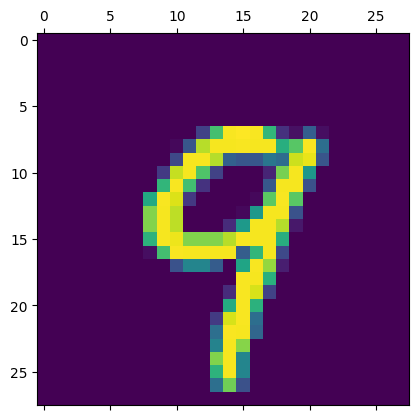

In [11]:
plt.matshow(x_test[12])


In [12]:
y_test[12]

9

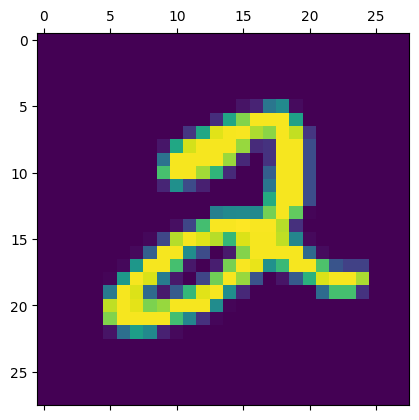

In [13]:
plt.matshow(x_train[5])


In [14]:
y_train[5]

2